<a href="https://colab.research.google.com/github/giakhangle/mayhoc/blob/main/tuan2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

thực hành 1

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
# Get Data
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
x
y
#tạo mô hình & huấn luyện
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x, y)
model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)
model.classes_
model.intercept_
model.coef_
#đánh giá mô hình
model.predict_proba(x)
model.predict(x)
model.score(x, y)
confusion_matrix(y, model.predict(x))
cm = confusion_matrix(y, model.predict(x))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
  for j in range(2):
    ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
print(classification_report(y, model.predict(x)))
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)
model.intercept_
model.coef_
model.predict_proba(x)
model.predict(x)
model.score(x, y)
confusion_matrix(y, model.predict(x))
print(classification_report(y, model.predict(x)))

thực hành 2

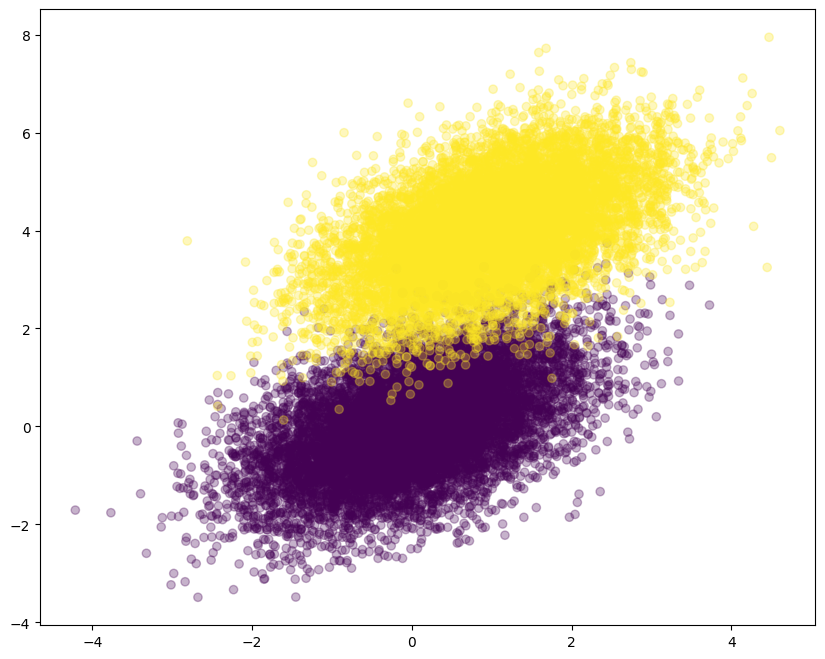

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(scores):
  return 1 / (1 + np.exp(-scores)) #hàm sigmoid
def log_likelihood(features, target, weights):  #hàm Ước lượng Cực đại
  scores = np.dot(features, weights)
  ll = np.sum(target * scores - np.log(1 + np.exp(scores)))
  return ll
def logistic_regression(features, target, num_steps, learning_rate, add_intercept=False):
  if add_intercept:
    intercept = np.ones((features.shape[0], 1))
    features = np.hstack((intercept, features))
    weights = np.zeros(features.shape[1])
  for step in range(num_steps):
    scores = np.dot(features, weights)
    predictions = sigmoid(scores)
    output_error_signal = target - predictions
    gradient = np.dot(features.T, output_error_signal)
    weights += learning_rate * gradien
  if step % 10000 == 0:
    print(log_likelihood(features, target, weights))
    return weights
np.random.seed(10)
num_observations = 10000
x1 = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, 0.5], [0.5, 1]], num_observations)
simulated_separableish_features = np.vstack((x1, x2)).astype(np.float32)
simulated_labels = np.hstack((np.zeros(num_observations), np.ones(num_observations)))
plt.figure(figsize=(10, 8))
plt.scatter(simulated_separableish_features[:, 0],simulated_separableish_features[:, 1], c=simulated_labels,alpha=0.3,)
plt.show()

thực hành 3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(scores):
  return 1 / (1 + np.exp(-scores))
xs = [scores / 10.0 for scores in range(-50, 50)]
plt.plot(xs,[sigmoid(scores) for scores in xs],'.',label='Logistic Regression')
plt.title("Duong Cong Chu S - sigmoid")
plt.show()

thực hành 4

[[-3.49045287]
 [ 1.49503536]]
[[0.0394889  0.0489303  0.11968489 0.12778735 0.17553346 0.18661527
  0.21037748 0.2230639  0.37745087 0.41316938 0.4683864  0.73000604
  0.74448374 0.758442   0.8509626  0.86894633 0.92853766 0.93334172
  0.99480838 0.99518051]]


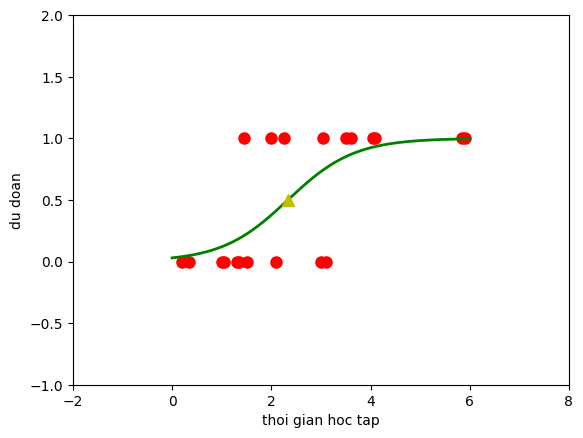

In [2]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)
X = np.array([[0.20, 0.35, 1.00, 1.05, 1.30, 1.35, 1.45, 1.50, 2.00, 2.10, 2.25, 3.00, 3.05, 3.10, 3.50, 3.60, 4.05, 4.10, 5.85, 5.90]])
y = np.array([0 ,0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])
X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)
def sigmoid(s):      #hàm sigmoid
  return 1/(1 + np.exp(-s))
def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count = 10000):
  w = [w_init]
  it = 0
  N = X.shape[1]
  d = X.shape[0]
  count = 0
  check_w_after = 20
  while count < max_count:
    #mix data
    mix_id = np.random.permutation(N)
    for i in mix_id:
      xi = X[:, i].reshape(d, 1)
      yi = y[i]
      zi = sigmoid(np.dot(w[-1].T, xi))
      w_new = w[-1] + eta*(yi - zi)*xi
      count +=1
      #stopping criteria
      if count%check_w_after == 0:
        if np.linalg.norm(w_new - w[-check_w_after]) < tol:
          return w
      w.append(w_new)
  return w
eta = .05
d = X.shape[0]
w_init = np.random.randn(d, 1)
w = logistic_sigmoid_regression(X, y, w_init, eta)
print(w[-1])
print(sigmoid(np.dot(w[-1].T, X)))
X0 = X[1, np.where(y==0)][0]
y0 = y[np.where(y==0)]
X1 = X[1, np.where(y==1)][0]
y1 = y[np.where(y==1)]
plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'ro', markersize = 8)
xx = np.linspace(0, 6, 1000)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
threshold = -w0/w1
yy = sigmoid(w0 + w1*xx)
plt.axis([-2, 8, -1, 2])
plt.plot(xx, yy, 'g-', linewidth = 2)
plt.plot(threshold, .5, 'y^', markersize = 8)
plt.xlabel('thoi gian hoc tap')
plt.ylabel('du doan')
plt.show()